# 处理excel文件并保存为jsonl文件

file_list: ['/home/ISTIC_0/abms/wechat/DT数据_占知智库.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_雷达通信电子战.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_专知智能防务.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_支点科技信息.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_精准毙命小姐姐.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_彼岸的鹰.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_AGI新分析.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_AerospaceDefense.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_军鹰动态.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_舰船知识.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_国防科技要闻.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_华语智库.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_海鹰资讯.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_从心推送的防务菌.xlsx', '/home/ISTIC_0/abms/wechat/DT数据_装备参考.xlsx']
处理文件: DT数据_占知智库.xlsx
DT数据_占知智库.xlsx 合法数据条数: 788
当前的合法数据条数: 788
处理文件: DT数据_雷达通信电子战.xlsx
DT数据_占知智库.xlsx 合法数据条数: 788
当前的合法数据条数: 788
处理文件: DT数据_雷达通信电子战.xlsx
DT数据_雷达通信电子战.xlsx 合法数据条数: 1389
当前的合法数据条数: 2177
处理文件: DT数据_专知智能防务.xlsx
DT数据_雷达通信电子战.xlsx 合法数据条数: 1389
当前的合法数据条数: 2177
处理文件: DT数据_专知智能防务.xlsx
DT数据_

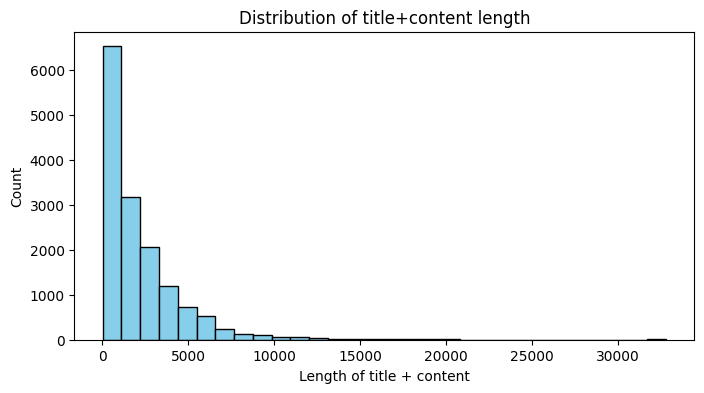

In [1]:
import pandas as pd
import os
import json
import re
import matplotlib.pyplot as plt

root = "/home/ISTIC_0/abms/wechat"

def contains_chinese(text):
    if not isinstance(text, str):
        return False
    return re.search(r'[\u4e00-\u9fff]', text) is not None

# 用 os.listdir 获取所有xlsx文件路径
xlsx_files = [os.path.join(root, f) for f in os.listdir(root) if f.endswith('.xlsx') and os.path.isfile(os.path.join(root, f))]

print(f"file_list: {xlsx_files}")

total_valid = 0
lengths = []
all_data_jsonl = os.path.join(root, 'all_data.jsonl')

with open(all_data_jsonl, 'w', encoding='utf-8') as fout:
    for file_path in xlsx_files:
        file_name = os.path.basename(file_path)
        print(f"处理文件: {file_name}")
        try:
            df = pd.read_excel(file_path)
        except Exception as e:
            print(f"读取{file_name}失败: {e}")
            continue

        col_name = file_name.split('-')[1] if '-' in file_name else 'unknown'
        fields = ['title', 'content', 'summary_content', col_name]
        available_fields = [f for f in fields if f in df.columns]
        if not available_fields:
            print(f"{file_name}无目标字段，跳过")
            continue

        valid_count = 0
        for _, row in df.iterrows():
            if 'content' in available_fields and not contains_chinese(row['content']):
                continue
            data = {f: row[f] for f in available_fields}
            fout.write(json.dumps(data, ensure_ascii=False) + '\n')
            valid_count += 1
            # 统计title+content长度
            title = str(row['title']) if 'title' in available_fields else ''
            content = str(row['content']) if 'content' in available_fields else ''
            lengths.append(len(title + content))
        print(f"{file_name} 合法数据条数: {valid_count}")
        total_valid += valid_count
        print(f"当前的合法数据条数: {total_valid}")

print(f"所有文件总合法数据条数: {total_valid}")

# 绘制title+content长度分布直方图
plt.figure(figsize=(8,4))
plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Length of title + content')
plt.ylabel('Count')
plt.title('Distribution of title+content length')
plt.show()

In [ ]:
# 处理jsonl文件